16:02:23 - cmdstanpy - INFO - Chain [1] start processing
16:02:23 - cmdstanpy - INFO - Chain [1] done processing


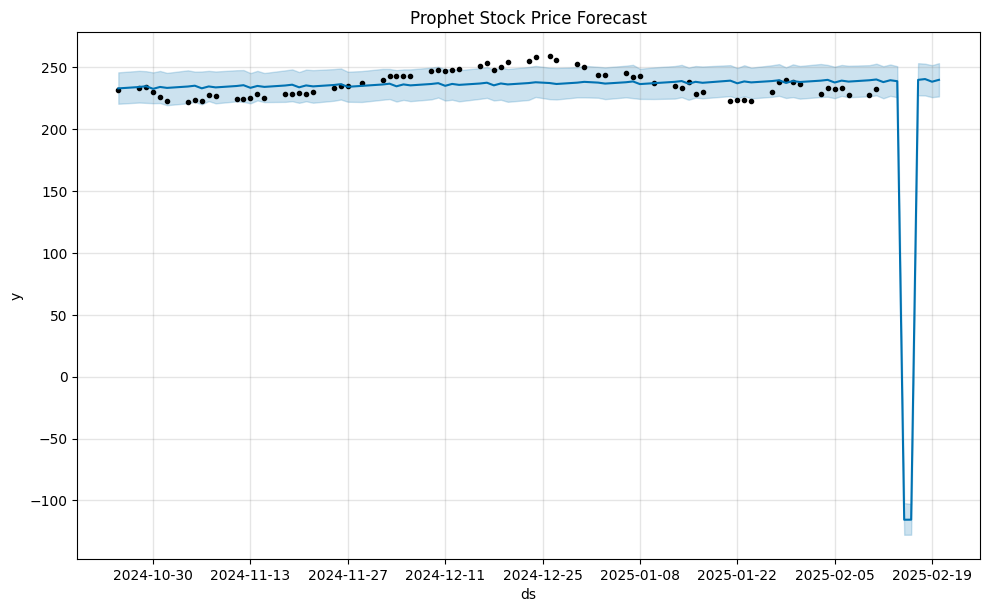

Mean Absolute Error (MAE): 84.1188


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# ✅ Step 1: Load Your CSV File
df = pd.read_csv("aapl_4mo_sorted.csv")  # Replace with actual filename

# ✅ Step 2: Ensure Correct Column Names
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]  # Adjust if needed
df["Date"] = pd.to_datetime(df["Date"])  # Convert Date to datetime
df = df[["Date", "Close"]]  # Keep only Date & Close Price

# ✅ Step 3: Rename Columns for Prophet
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

# ✅ Step 4: Split into Train and Test Sets
train_size = int(len(df) * 0.9)  # 90% Train, 20% Test
train, test = df[:train_size], df[train_size:]

# ✅ Step 5: Train the Prophet Model
#model = Prophet()
model = Prophet(growth="linear", changepoint_prior_scale=0.01)

model.fit(train)

# ✅ Step 6: Create Future Dates & Forecast
future = model.make_future_dataframe(periods=len(test))  # Predict for test set size
forecast = model.predict(future)

# ✅ Step 7: Plot the Forecast
fig = model.plot(forecast)
plt.title("Prophet Stock Price Forecast")
plt.show()

# ✅ Step 8: Evaluate Model Performance
predicted = forecast['yhat'].iloc[-len(test):].values  # Last n predictions
actual = test["y"].values  # Actual test values

mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


16:05:33 - cmdstanpy - INFO - Chain [1] start processing
16:05:33 - cmdstanpy - INFO - Chain [1] done processing


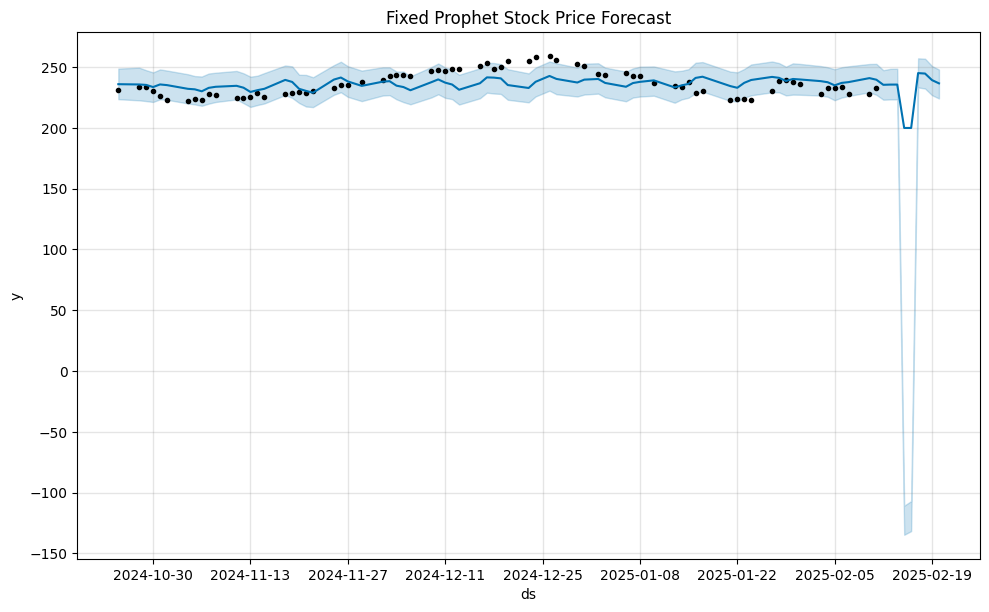

Mean Absolute Error (MAE): 14.1030


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# ✅ Load Data
df = pd.read_csv("aapl_4mo_sorted.csv")  # Replace with actual filename
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]  # Ensure correct columns
df["Date"] = pd.to_datetime(df["Date"])  # Convert Date column to datetime
df = df[["Date", "Close"]]  # Keep only Date & Close Price
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)  # Prophet format

# ✅ Set Realistic Bounds for Forecasting
y_min = df["y"].min() * 0.9  # Floor 10% below lowest price
y_max = df["y"].max() * 1.1  # Ceiling 10% above highest price
df["cap"] = y_max
df["floor"] = y_min

# ✅ Use More Training Data (90% Train, 10% Test)
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# ✅ Train Prophet with Adjustments
model = Prophet(growth="linear", changepoint_prior_scale=0.005)  # Reduce sensitivity
model.add_seasonality(name="monthly", period=30.5, fourier_order=5)  # Add seasonality
model.fit(train)

# ✅ Forecasting
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# ✅ Clip to Prevent Outliers
forecast["yhat"] = forecast["yhat"].clip(lower=y_min, upper=y_max)

# ✅ Plot Forecast
fig = model.plot(forecast)
plt.title("Fixed Prophet Stock Price Forecast")
plt.show()

# ✅ Evaluate MAE
predicted = forecast['yhat'].iloc[-len(test):].values
actual = test["y"].values
mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
